In [3]:
model_path = 'C:\\Users\\PC\\Desktop\\lisnen_segmented_working_data\\lisnen_research_files\\audio_research_crnn_files\\models\\crnn.keras'  #path to your saved model



In [4]:
# load model
from tensorflow.keras.models import Sequential,load_model
dcase_model = load_model(model_path)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
spectrogram = "C:\\Users\\PC\\Desktop\\lisnen_segmented_working_data\\validation_data\\test\\Door_Bell_Melspectrorams\\doorbell_audio-158.png"
# Load the image
img_path = 'path_to_your_image.jpg'
img = load_img(spectrogram)  # Load the image with PIL format
img_array = img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Define the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator
generator = datagen.flow(img_array, batch_size=1)
# Get a single image from the generator
single_image = generator[0][0].astype('double')  # Get the image without batch dimension

In [20]:
predictions = dcase_model.predict(generator)

1/1 [==============================] - 0s 80ms/step


In [25]:
class_names = ['Baby cry', 'Door bell', 'door knock', 'fire alarm']
for i, class_name in enumerate(class_names):
        print(f"Prediction for {class_name}: {predictions[0][i]}")

Prediction for Baby cry: 0.33072429895401
Prediction for Door bell: 0.5710476040840149
Prediction for door knock: 0.00230070180259645
Prediction for fire alarm: 0.0959274023771286


In [22]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

c:\Users\PC\.conda\envs\crnn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(single_image.astype('double'), dcase_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 871ms/step


  1%|          | 10/1000 [00:00<01:36, 10.24it/s]

1/1 [==============================] - 1s 721ms/step


  2%|▏         | 20/1000 [00:01<01:27, 11.14it/s]

1/1 [==============================] - 1s 688ms/step


  3%|▎         | 30/1000 [00:02<01:23, 11.66it/s]

1/1 [==============================] - 1s 672ms/step


  4%|▍         | 40/1000 [00:03<01:19, 12.13it/s]

1/1 [==============================] - 0s 319ms/step


  5%|▌         | 50/1000 [00:03<01:05, 14.60it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▌         | 60/1000 [00:04<00:51, 18.12it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 70/1000 [00:04<00:43, 21.23it/s]

1/1 [==============================] - 0s 155ms/step


  8%|▊         | 80/1000 [00:04<00:37, 24.71it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 90/1000 [00:04<00:33, 27.31it/s]

1/1 [==============================] - 0s 135ms/step


 10%|█         | 100/1000 [00:05<00:30, 29.44it/s]

1/1 [==============================] - 0s 150ms/step


 11%|█         | 110/1000 [00:05<00:28, 31.19it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 127/1000 [00:05<00:23, 37.37it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 132/1000 [00:06<00:27, 32.04it/s]

1/1 [==============================] - 0s 167ms/step


 14%|█▍        | 140/1000 [00:06<00:27, 31.49it/s]

1/1 [==============================] - 0s 159ms/step


 15%|█▌        | 150/1000 [00:06<00:25, 32.75it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▌        | 160/1000 [00:07<00:25, 33.01it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 170/1000 [00:07<00:24, 33.67it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 180/1000 [00:07<00:24, 33.73it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 190/1000 [00:07<00:23, 34.62it/s]

1/1 [==============================] - 0s 157ms/step


 20%|██        | 200/1000 [00:08<00:22, 35.28it/s]

1/1 [==============================] - 0s 160ms/step


 21%|██        | 210/1000 [00:08<00:22, 35.78it/s]

1/1 [==============================] - 0s 154ms/step


 22%|██▏       | 220/1000 [00:08<00:22, 35.40it/s]

1/1 [==============================] - 0s 134ms/step


 23%|██▎       | 230/1000 [00:08<00:21, 36.07it/s]

1/1 [==============================] - 0s 153ms/step


 25%|██▍       | 248/1000 [00:09<00:18, 41.55it/s]

1/1 [==============================] - 0s 151ms/step


 25%|██▌       | 253/1000 [00:09<00:21, 34.14it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▌       | 260/1000 [00:09<00:23, 31.84it/s]

1/1 [==============================] - 0s 160ms/step


 27%|██▋       | 270/1000 [00:10<00:22, 33.07it/s]

1/1 [==============================] - 0s 151ms/step


 28%|██▊       | 280/1000 [00:10<00:21, 33.43it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▉       | 290/1000 [00:10<00:20, 34.35it/s]

1/1 [==============================] - 0s 160ms/step


 30%|███       | 300/1000 [00:10<00:19, 35.13it/s]

1/1 [==============================] - 0s 164ms/step


 31%|███       | 310/1000 [00:11<00:19, 35.00it/s]

1/1 [==============================] - 0s 154ms/step


 32%|███▏      | 320/1000 [00:11<00:19, 35.67it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 330/1000 [00:11<00:18, 35.66it/s]

1/1 [==============================] - 0s 166ms/step


 35%|███▍      | 347/1000 [00:12<00:16, 39.93it/s]

1/1 [==============================] - 0s 140ms/step


 35%|███▌      | 352/1000 [00:12<00:19, 33.83it/s]

1/1 [==============================] - 0s 155ms/step


 36%|███▌      | 360/1000 [00:12<00:19, 32.38it/s]

1/1 [==============================] - 0s 160ms/step


 37%|███▋      | 370/1000 [00:12<00:18, 33.46it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 380/1000 [00:13<00:17, 34.72it/s]

1/1 [==============================] - 0s 194ms/step


 40%|███▉      | 399/1000 [00:13<00:15, 38.08it/s]

1/1 [==============================] - 0s 158ms/step


 40%|████      | 404/1000 [00:14<00:18, 32.17it/s]

1/1 [==============================] - 0s 166ms/step


 41%|████      | 410/1000 [00:14<00:20, 29.20it/s]

1/1 [==============================] - 0s 160ms/step


 42%|████▏     | 420/1000 [00:14<00:18, 30.63it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 430/1000 [00:14<00:17, 32.35it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 440/1000 [00:15<00:17, 32.78it/s]

1/1 [==============================] - 0s 158ms/step


 45%|████▌     | 450/1000 [00:15<00:16, 33.45it/s]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 467/1000 [00:15<00:14, 37.98it/s]

1/1 [==============================] - 0s 164ms/step


 47%|████▋     | 472/1000 [00:16<00:16, 32.30it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 480/1000 [00:16<00:16, 31.44it/s]

1/1 [==============================] - 0s 150ms/step


 49%|████▉     | 490/1000 [00:16<00:15, 33.54it/s]

1/1 [==============================] - 0s 166ms/step


 50%|█████     | 500/1000 [00:16<00:14, 34.29it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 510/1000 [00:17<00:14, 34.50it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 520/1000 [00:17<00:13, 35.24it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 530/1000 [00:17<00:13, 35.53it/s]

1/1 [==============================] - 0s 166ms/step


 54%|█████▍    | 540/1000 [00:18<00:12, 35.49it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▌    | 550/1000 [00:18<00:12, 35.88it/s]

1/1 [==============================] - 0s 158ms/step


 56%|█████▌    | 560/1000 [00:18<00:12, 35.25it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 570/1000 [00:18<00:12, 35.23it/s]

1/1 [==============================] - 0s 156ms/step


 58%|█████▊    | 580/1000 [00:19<00:11, 35.08it/s]

1/1 [==============================] - 0s 159ms/step


 60%|█████▉    | 598/1000 [00:19<00:09, 40.88it/s]

1/1 [==============================] - 0s 143ms/step


 60%|██████    | 603/1000 [00:19<00:11, 34.75it/s]

1/1 [==============================] - 0s 154ms/step


 61%|██████    | 610/1000 [00:20<00:12, 32.12it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 620/1000 [00:20<00:11, 33.24it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 630/1000 [00:20<00:10, 34.12it/s]

1/1 [==============================] - 0s 155ms/step


 64%|██████▍   | 640/1000 [00:20<00:10, 34.98it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 650/1000 [00:21<00:10, 34.54it/s]

1/1 [==============================] - 0s 165ms/step


 66%|██████▌   | 660/1000 [00:21<00:09, 34.78it/s]

1/1 [==============================] - 0s 150ms/step


 67%|██████▋   | 670/1000 [00:21<00:09, 35.71it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 680/1000 [00:22<00:09, 35.24it/s]

1/1 [==============================] - 0s 155ms/step


 69%|██████▉   | 690/1000 [00:22<00:08, 35.37it/s]

1/1 [==============================] - 0s 195ms/step


 70%|███████   | 700/1000 [00:22<00:09, 32.22it/s]

1/1 [==============================] - 0s 161ms/step


 72%|███████▏  | 717/1000 [00:23<00:07, 37.99it/s]

1/1 [==============================] - 0s 175ms/step


 72%|███████▏  | 722/1000 [00:23<00:08, 32.14it/s]

1/1 [==============================] - 0s 158ms/step


 73%|███████▎  | 730/1000 [00:23<00:08, 31.53it/s]

1/1 [==============================] - 0s 182ms/step


 74%|███████▍  | 740/1000 [00:23<00:08, 32.45it/s]

1/1 [==============================] - 0s 156ms/step


 75%|███████▌  | 750/1000 [00:24<00:07, 33.08it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 760/1000 [00:24<00:07, 33.84it/s]

1/1 [==============================] - 0s 166ms/step


 77%|███████▋  | 770/1000 [00:24<00:06, 34.50it/s]

1/1 [==============================] - 0s 153ms/step


 78%|███████▊  | 780/1000 [00:24<00:06, 34.65it/s]

1/1 [==============================] - 0s 160ms/step


 79%|███████▉  | 790/1000 [00:25<00:05, 35.34it/s]

1/1 [==============================] - 0s 167ms/step


 80%|████████  | 800/1000 [00:25<00:05, 35.55it/s]

1/1 [==============================] - 0s 160ms/step


 81%|████████  | 810/1000 [00:25<00:05, 35.54it/s]

1/1 [==============================] - 0s 161ms/step


 82%|████████▏ | 820/1000 [00:26<00:05, 35.42it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▎ | 837/1000 [00:26<00:04, 39.80it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 842/1000 [00:26<00:04, 32.75it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 850/1000 [00:27<00:04, 32.24it/s]

1/1 [==============================] - 0s 150ms/step


 86%|████████▌ | 860/1000 [00:27<00:04, 33.59it/s]

1/1 [==============================] - 0s 149ms/step


 87%|████████▋ | 870/1000 [00:27<00:03, 34.87it/s]

1/1 [==============================] - 0s 165ms/step


 88%|████████▊ | 880/1000 [00:27<00:03, 34.91it/s]

1/1 [==============================] - 0s 158ms/step


 89%|████████▉ | 890/1000 [00:28<00:03, 35.47it/s]

1/1 [==============================] - 0s 166ms/step


 90%|█████████ | 900/1000 [00:28<00:02, 34.96it/s]

1/1 [==============================] - 0s 152ms/step


 91%|█████████ | 910/1000 [00:28<00:02, 35.76it/s]

1/1 [==============================] - 0s 158ms/step


 92%|█████████▏| 920/1000 [00:28<00:02, 36.09it/s]

1/1 [==============================] - 0s 164ms/step


 93%|█████████▎| 930/1000 [00:29<00:02, 34.92it/s]

1/1 [==============================] - 0s 151ms/step


 94%|█████████▍| 940/1000 [00:29<00:01, 35.62it/s]

1/1 [==============================] - 0s 168ms/step


 96%|█████████▌| 956/1000 [00:29<00:01, 38.57it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 961/1000 [00:30<00:01, 31.90it/s]

1/1 [==============================] - 0s 215ms/step


 97%|█████████▋| 970/1000 [00:30<00:01, 28.74it/s]

1/1 [==============================] - 0s 163ms/step


 98%|█████████▊| 980/1000 [00:30<00:00, 29.51it/s]

1/1 [==============================] - 0s 201ms/step


 99%|█████████▉| 990/1000 [00:31<00:00, 29.16it/s]

1/1 [==============================] - 0s 158ms/step


100%|██████████| 1000/1000 [00:31<00:00, 31.71it/s]


In [30]:
explanation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..128.0].


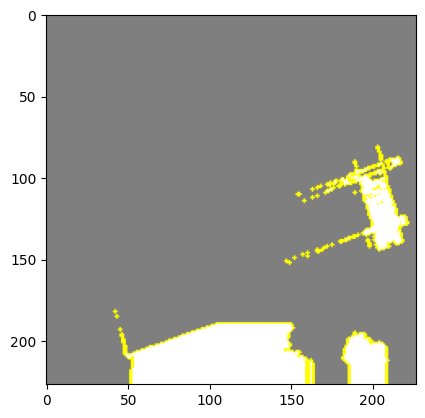

In [39]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

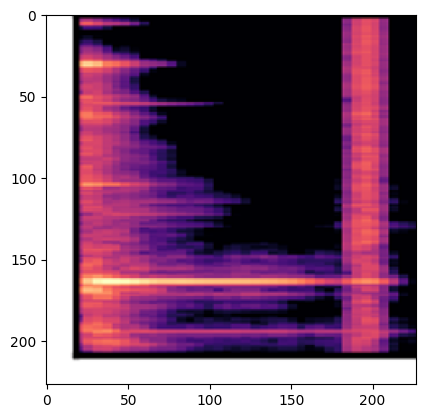

In [36]:
plt.imshow(img)